,Substance,Source,Type_Event,Region,Time_Period,Year_Quarter,Disaggregator,Unit,Value
0,Opioids,Deaths,Total apparent opioid toxicity deaths,British Columbia,By year,2016,NaN,Number,805
1,Opioids,Deaths,Total apparent opioid toxicity deaths,British Columbia,By year,2017,NaN,Number,1287
2,Opioids,Deaths,Total apparent opioid toxicity deaths,British Columbia,By year,2018,NaN,Number,1569
3,Opioids,Deaths,Total apparent opioid toxicity deaths,British Columbia,By year,2019,NaN,Number,1013
4,Opioids,Deaths,Total apparent opioid toxicity deaths,British Columbia,By year,2020,NaN,Number,1738


,Substance,Source,Type_Event,Region,Time_Period,Year_Quarter,Disaggregator,Unit,Value
0,Opioids,Deaths,Total apparent opioid toxicity deaths,British Columbia,By year,2016,NaN,Number,805
1,Opioids,Deaths,Total apparent opioid toxicity deaths,British Columbia,By year,2017,NaN,Number,1287
2,Opioids,Deaths,Total apparent opioid toxicity deaths,British Columbia,By year,2018,NaN,Number,1569
3,Opioids,Deaths,Total apparent opioid toxicity deaths,British Columbia,By year,2019,NaN,Number,1013
4,Opioids,Deaths,Total apparent opioid toxicity deaths,British Columbia,By year,2020,NaN,Number,1738
5,Opioids,Deaths,Total apparent opioid toxicity deaths,Alberta,By year,2016,NaN,Number,602
6,Opioids,Deaths,Total apparent opioid toxicity deaths,Alberta,By year,2017,NaN,Number,744
7,Opioids,Deaths,Total apparent opioid toxicity deaths,Alberta,By year,2018,NaN,Number,805
8,Opioids,Deaths,Total apparent opioid toxicity deaths,Alberta,By year,2019,NaN,Number,623
9,Opioids,Deaths,Total apparent opioid toxicity deaths,Alberta,By year,2020,NaN,Number,1144





   index Substance  Source                             Type_Event  \
0      4   Opioids  Deaths  Total apparent opioid toxicity deaths   
1      9   Opioids  Deaths  Total apparent opioid toxicity deaths   
2     14   Opioids  Deaths  Total apparent opioid toxicity deaths   
3     23   Opioids  Deaths  Total apparent opioid toxicity deaths   
4     28   Opioids  Deaths  Total apparent opioid toxicity deaths   

             Region Time_Period Year_Quarter Disaggregator    Unit Value  \
0  British Columbia     By year         2020           NaN  Number  1738   
1           Alberta     By year         2020           NaN  Number  1144   
2      Saskatchewan     By year         2020           NaN  Number   230   
3           Ontario     By year         2020           NaN  Number  2425   
4            Quebec     By year         2020           NaN  Number   547   

   Value_int  
0       1738  
1       1144  
2        230  
3       2425  
4        547  


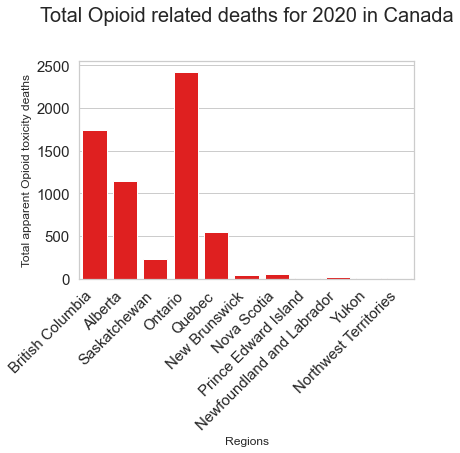




  Year_Quarter  Value_int
0         2016       2825
1         2017       3916
2         2018       4389
3         2019       3830
4         2020       6214


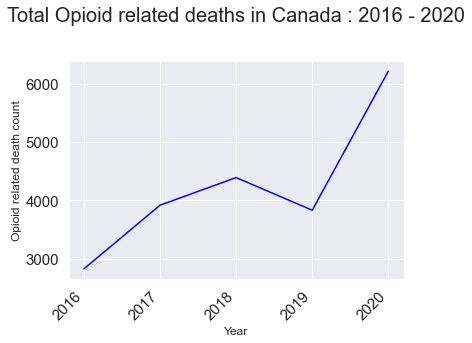




                       Region Year_Quarter  Value_int
0                     Alberta         2016        602
1                     Alberta         2017        744
2                     Alberta         2018        805
3                     Alberta         2019        623
4                     Alberta         2020       1144
5            British Columbia         2016        805
6            British Columbia         2017       1287
7            British Columbia         2018       1569
8            British Columbia         2019       1013
9            British Columbia         2020       1738
10                   Manitoba         2016         88
11                   Manitoba         2017        106
12                   Manitoba         2018         93
13                   Manitoba         2019         26
14              New Brunswick         2016         34
15              New Brunswick         2017         38
16              New Brunswick         2018         30
17              New Bruns

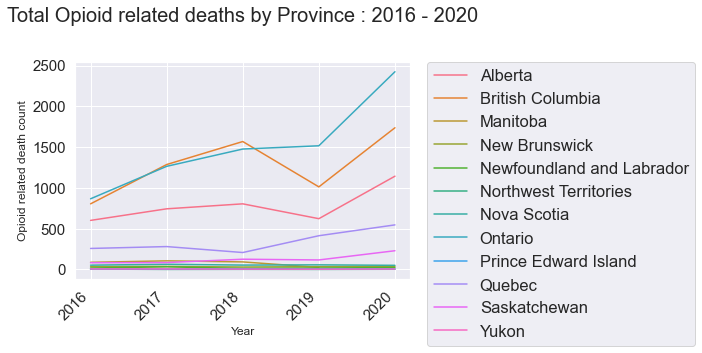

In [3]:
# import all required module
import pandas as pd
import seaborn as sns
import numpy as np
import os
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport

# import loading of data method
from scripts import project_functions

# Load and proces data
df = project_functions.load_and_process("https://health-infobase.canada.ca/src/doc/SubstanceHarmsData.csv")
display(df.head())

# explore for numerical columns:
df.describe(include='all').T
display(df.head(10))

# convert "Value" column into integers and assign it to a new column
df['Value_int'] = df['Value'].astype(int)

# print new bank lines
print("\n\n")

# ****************** Graph 1 ******************
#Here we want to see how the total deaths differ from province to province.. using death count as a measure
df1 = df.groupby(["Region","Year_Quarter"]).filter(lambda x: (x["Year_Quarter"] == '2020').any())
df1 = df1.reset_index()
print(df1.head())

sns.set_theme(style="whitegrid", font_scale=1.5 )
sns.barplot(data = df1,x = 'Region', y = 'Value_int', color = 'red')
plt.xticks(fontsize = 15, rotation=45, ha='right')
plt.yticks(fontsize = 15)
plt.xlabel('Regions', size=12)
plt.ylabel('Total apparent Opioid toxicity deaths', size=12)
plt.title('Total Opioid related deaths for 2020 in Canada', size=20, pad=40)
plt.show()

# print new bank lines
print("\n\n")
# ****************** Graph 2 ******************
#Here we want to explore how the opioid crisis has progressed in canada. Again use death count as a measure. 
df2 = df.groupby('Year_Quarter').Value_int.sum()
df2 = df2.reset_index()
print(df2.head())

sns.set_theme(style="darkgrid", font_scale=1.5 )
sns.lineplot(data = df2,x = 'Year_Quarter', y = 'Value_int', color = 'blue')
plt.xticks(fontsize = 15, rotation=45, ha='right')
plt.yticks(fontsize = 15)
plt.xlabel('Year', size=12)
plt.ylabel('Opioid related death count', size=12)
plt.title('Total Opioid related deaths in Canada : 2016 - 2020', size=20, pad=40)
plt.show()

# print new bank lines
print("\n\n")
# ****************** Graph 3 ******************
#Curious to see if the same trend seen above..for all of canada.. will be the same province to province. yes.. we can see its the same trend followed
df3 = df.groupby(["Region","Year_Quarter"]).Value_int.sum()
df3 = df3.reset_index()
print(df3)

sns.lineplot(data=df3, x="Year_Quarter", y="Value_int", hue="Region")
#sns.set(rc={"figure.figsize":(30, 15)})
plt.xticks(fontsize = 15, rotation=45, ha='right')
plt.yticks(fontsize = 15)
plt.xlabel('Year', size=12)
plt.ylabel('Opioid related death count', size=12)
plt.title('Total Opioid related deaths by Province : 2016 - 2020', size=20, pad=40)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


Initial observations from visualizations above:
 
<li>There are definitely some regions vastly more affected by the opioid crisis compared to others .. looks like Ontario, BC, Alberta are affected disproportionately
<li>Total opioid crisis has definitely been getting worse... possible factors that could be contributing???
<li>Similar to the nationwide picture, all provinces are also seeing an upward trend in death count confiriming it